In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf

## Cosign Similarity (Find the similiar pattern to recent 30days)

In [2]:
my_stock = 'NVDA'

In [3]:
stock = yf.Ticker(my_stock).history(interval='1d',period='5y').reset_index()
stock['Date']=stock['Date'].dt.date
stock.sort_values(by='Date', ascending=False, inplace=True)
stock.reset_index(drop=True,inplace=True)

In [5]:
stock_sector = yf.Ticker(my_stock).info['sector']
stock_industry = yf.Ticker(my_stock).info['industry']
stock_sector,stock_industry

('Technology', 'Semiconductors')

In [6]:
def cosign_similiarity(x,y) :
    return np.dot(x,y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))

def normalize(df) : 
    return ((df['Close'] - df['Close'].min())/(df['Close'].max()-df['Close'].min()))

In [8]:
#Normalize
base_df=stock.iloc[0:30][['Date','Close']]
base_df_norm=normalize(base_df)

In [18]:
#Window_size/Predict/Moving_Cnt
window_size = len(base_df)
predict_date=10
moving_cnt=len(stock)-window_size-predict_date-1

In [19]:
#Cosign Similiarty
sim_list = []
for i in range(moving_cnt) :
    target = stock[i:i+window_size]
    target_norm = normalize(target)
    cos_similiarity = cosign_similiarity(base_df_norm,target_norm)
    sim_list.append(cos_similiarity)

In [24]:
pd.Series(sim_list).sort_values(ascending=False).head(10)

0      1.000000
1      0.987032
393    0.982791
394    0.982774
341    0.982029
36     0.981766
619    0.980369
342    0.980146
37     0.979198
491    0.978697
dtype: float64

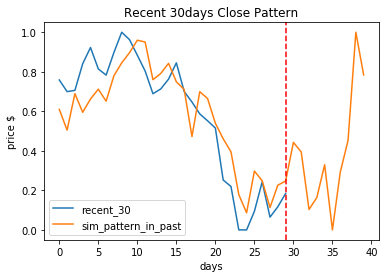

In [26]:
plt.plot(base_df_norm.values)
idx = 619
sim_df=stock[idx:idx+window_size+predict_date]
sim_df_norm = normalize(sim_df)
plt.plot(sim_df_norm.values)
plt.title('Recent 30days Close Pattern')
plt.axvline(x=window_size-1,color='red',linestyle='--')
plt.xlabel('days')
plt.ylabel('price $')
plt.legend(['recent_30','sim_pattern_in_past'])